# Find biological motifs

To make sure our sampling strategy makes sense, we manually enter a few biological motifs.
We then look for these motifs in a large random sample, as well as in a large biological random sample.
If everything is correct, we should find the real motifs more frequently in the latter sample than in the former.

In [1]:
from discrete_motif import DiscreteGrnMotif
import discrete_motif_generator as generator
import discrete_motif_plotting as visualize

from copy import deepcopy
import numpy as np
import os
import pickle
import random

In [2]:
# define a few motifs
real_motifs = []

In [3]:
# load data back, start from this step to use previous run
directory = "../data"
name = "samples.pkl"

with open(os.path.join(directory, name), 'rb') as input:
    samples = pickle.load(input)

In [9]:
for i in range(0, len(samples)):
    args = (samples[i]["network_size"], samples[i]["logic_size"], samples[i]["nudge_size"], sample[2][-1][0])
    print("Using %s nodes, %s-valued logic, and %s-epsilon %s-target nudge" % args)
    sample_random = []
    sample_bio = []
    
    for sample in samples[i]["random_tables"]:
        sample_random.append(sample[0])
    for sample in samples[i]["bio_tables"]:
        sample_bio.append(sample[0])

    bio_total = 0
    random_total = 0
    bio_matched_motifs = []
    random_matched_motifs = []
    
    # to test, it seems to work :)
    # can we find the real thing?
    real_motifs = [sample_random[0]]
    # can we find a shuffled version?
    permuted_motif = deepcopy(real_motifs[0])
    mapping = list(range(0, permuted_motif.grn_vars["gene_cnt"]))
    random.shuffle(mapping)
    print("Shuffled to %s" % (mapping))
    permuted_table = permuted_motif.permute_transition_table(mapping)
    permuted_motif.transition_table = permuted_table
    real_motifs.append(permuted_motif)
    
    for real_motif in real_motifs:
        random_matches = real_motif.find_in_sample(sample_random, strict=False)
        bio_matches = real_motif.find_in_sample(sample_bio, strict=False)

        if len(random_matches) > 0:
            random_total += len(random_matches)
            random_matched_motifs.append(real_motif)
        if len(bio_matches) > 0:
            bio_total += len(bio_matches)
            bio_matched_motifs.append(real_motif)

    args = (bio_total, len(bio_matched_motifs), len(real_motifs))
    print("Found %d matches in the bio sample, for a total of %d out of %d real motifs." % args)
    args = (random_total, len(random_matched_motifs), len(real_motifs))
    print("Found %d matches in the random sample, for a total of %d out of %d real motifs." % args)

Using 2 nodes, 2-valued logic, and 0.5-epsilon 2-target nudge
Shuffled to [0, 1]
Found 0 matches in the bio sample, for a total of 0 out of 2 real motifs.
Found 2 matches in the random sample, for a total of 2 out of 2 real motifs.
Using 2 nodes, 3-valued logic, and 0.5-epsilon 2-target nudge
Shuffled to [1, 0]
Found 0 matches in the bio sample, for a total of 0 out of 2 real motifs.
Found 2 matches in the random sample, for a total of 2 out of 2 real motifs.
Using 3 nodes, 2-valued logic, and 0.5-epsilon 2-target nudge
Shuffled to [2, 0, 1]
Found 0 matches in the bio sample, for a total of 0 out of 2 real motifs.
Found 2 matches in the random sample, for a total of 2 out of 2 real motifs.
Using 3 nodes, 3-valued logic, and 0.5-epsilon 3-target nudge
Shuffled to [0, 2, 1]
Found 0 matches in the bio sample, for a total of 0 out of 2 real motifs.
Found 2 matches in the random sample, for a total of 2 out of 2 real motifs.
Using 4 nodes, 2-valued logic, and 0.5-epsilon 3-target nudge
Shuf

# Finding cycles in our samples

Using 2 nodes, 2-valued logic, and 0.5-epsilon 2-target nudge


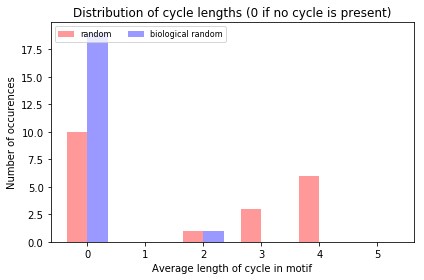

Using 2 nodes, 3-valued logic, and 0.5-epsilon 2-target nudge


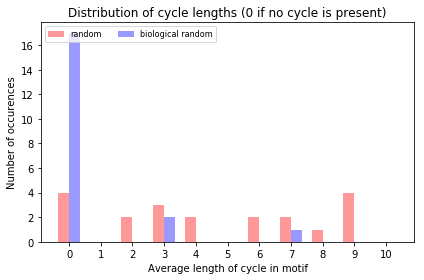

Using 3 nodes, 2-valued logic, and 0.5-epsilon 3-target nudge


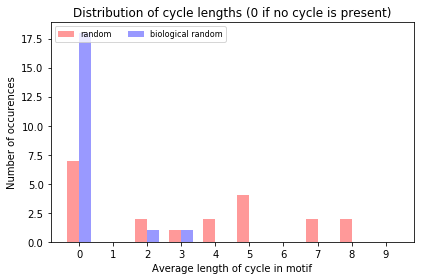

Using 3 nodes, 3-valued logic, and 0.5-epsilon 3-target nudge


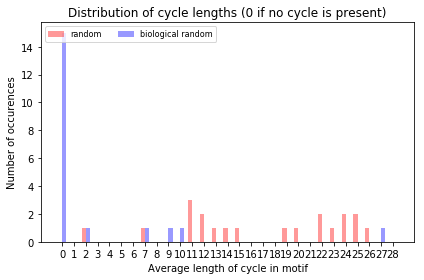

Using 4 nodes, 2-valued logic, and 0.5-epsilon 4-target nudge


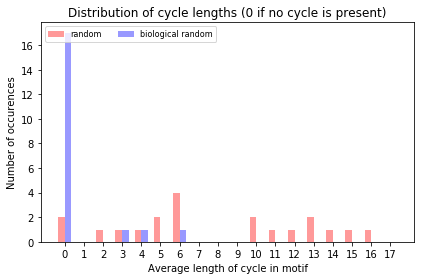

Using 4 nodes, 3-valued logic, and 0.5-epsilon 4-target nudge


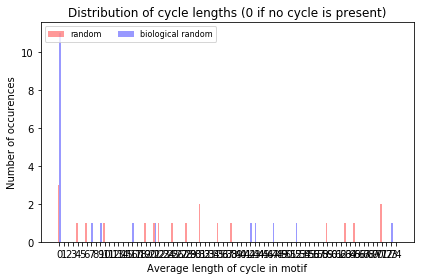

In [7]:
for i in range(0, len(samples)):
    args = (samples[i]["network_size"], samples[i]["logic_size"], samples[i]["nudge_size"], sample[2][-1][0])
    print("Using %s nodes, %s-valued logic, and %s-epsilon %s-target nudge" % args)
    random_cycles = []
    bio_cycles = []
    for sample in samples[i]["random_tables"]:
        lengths = [len(x) for x in sample[0].is_cyclical()]
        if len(lengths) == 0:
            lengths = [0]
        avg_length = int(np.mean(lengths))
        random_cycles.append(avg_length)
    for sample in samples[i]["bio_tables"]:
        lengths = [len(x) for x in sample[0].is_cyclical()]
        if len(lengths) == 0:
            lengths = [0]
        avg_length = int(np.mean(lengths))
        bio_cycles.append(avg_length)
    
    colors = ["r", "b"]
    labels = ["random", "biological random"]
    title = "Distribution of cycle lengths (0 if no cycle is present)"
    axes_labels = ["Average length of cycle in motif", "Number of occurences"]
    visualize.plot_bar([random_cycles, bio_cycles], colors, labels, title, axes_labels=axes_labels)